# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
X = df[['TV','radio','newspaper']]
y = df['sales']
n = len(y)
X = np.array( X.values.reshape(n,3))
y = df['sales'].values.reshape(n,1)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
param = np.zeros(X.shape[1])

def costf(X, y, param):
    return np.sum((X.dot(param) - y) ** 2)/(2 * len(y))

def coordinate_descent(X, y, param, iter=300):
    cost_history = [0] * (iter+1)
    cost_history[0] = costf(X, y, param)

    for iteration in range(iter):
        for i in range(len(param)):
            dele = np.dot(np.delete(X, i, axis=1), np.delete(param, i, axis=0))
            param[i] = np.dot(X[:,i].T, (y.ravel() - dele))/np.sum(np.square(X[:,i]))
            cost = costf(X, y, param)
            cost_history[iteration+1] = cost

    return param, cost_history

cret, cxret = coordinate_descent(X, y, param.copy())

cret

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
df['TV'] = (df['TV'] - df['TV'].mean()) / df['TV'].std()
df['radio'] = (df['radio'] - df['radio'].mean()) / df['radio'].std()
df['newspaper'] = (df['newspaper'] - df['newspaper'].mean()) / df['newspaper'].std()
X = df[['TV','radio','newspaper']]
y = df['sales']
n = len(y)
X = np.array( X.values.reshape(n,3))
y = df['sales'].values.reshape(n,1)

**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
def mse_error(y, y_pred):
    
    mse = np.mean((y - y_pred)**2)

    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [11]:
def average(X, y):
     for i in range(len(y)):
        y_pred = np.mean(y)
     return y_pred
 
y_pred = average(X, y)
print (y_pred)
MSE = mse_error(y, y_pred)
print (MSE)

14.0225
27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
def lin_pred(X, w):
    
    return X.dot(w)

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
def stoch_grad_step(X, y, w, train_ind, eta):

    dir = (2 * X[train_ind] * (lin_pred(X[train_ind], w) - y[train_ind]))
    
    return (w - dir * eta)

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
def stoch_grad_descend(X, y, w_init, eta, max_iter, min_d = 0.000001):
    
    dist = np.inf
    error_list = []
    count = 0
    w = np.array(w_init)
    
    while (dist > min_d) and (count < max_iter):
        count += 1
        index = np.random.randint(X.shape[0])
        error_list.append(mse_error(y, lin_pred(X, w)))
        w_upd = stoch_grad_step(X, y, w, index, eta)
        dist = np.linalg.norm(w_upd - w)
        w = w_upd
        
    return w, error_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [15]:
w, error_list = stoch_grad_descend(X=X, y=y, w_init=np.ones(4), eta=0.01, max_iter=100000, min_d=0.000001)

**Постройте график зависимости ошибки от номера итерации**

Text(0, 0.5, 'MSE')

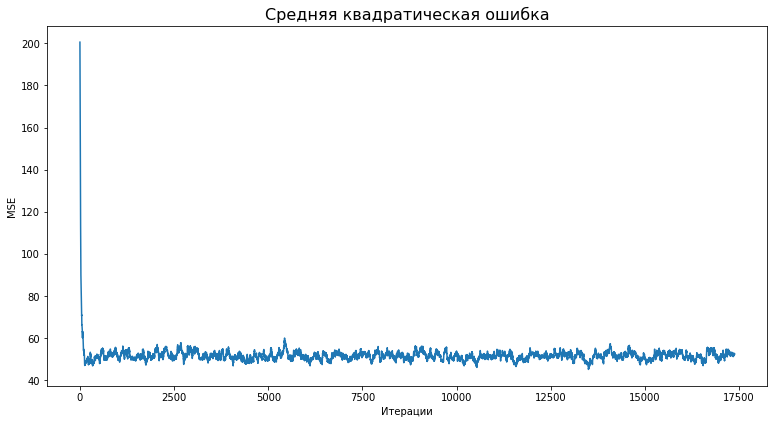

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(error_list)
ax.set_title('Средняя квадратическая ошибка', fontsize=16)
ax.set_xlabel('Итерации')
ax.set_ylabel('MSE')

**Выведите вектор весов, к которому сошелся метод.**

In [17]:
w

array([14.064436  ,  4.11596281,  2.78333104, -0.18392366])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [18]:
error_list[-1]

52.48924026600496